<a href="https://colab.research.google.com/github/MiraGlaceon/lessons-and-pets/blob/main/HW_Lesson16_Telco_DT_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: Оценка моделей классификации

Цель задания: самостоятельно обучить Decision Tree и правильно оценить его качество с помощью различных метрик.

Датасет: Telco Customer Churn (отток клиентов телекоммуникационной компании).

Задача: предсказать, уйдет ли клиент от компании (Churn: Yes/No).

Что нужно сделать:
1. Загрузить и изучить данные.
2. Провести предобработку.
3. Обучить Decision Tree.
4. Рассчитать все метрики: Accuracy, Precision, Recall, F1-score.
5. Построить Confusion Matrix.
6. Построить ROC и PR кривые.
7. Найти оптимальный порог классификации.
8. Ответить на аналитические вопросы.


# Шаг 1. Импорт библиотек

Задание: импортируйте все необходимые библиотеки для работы с данными, обучения Decision Tree и оценки качества.

Что нужно импортировать:
- pandas, numpy для работы с данными
- matplotlib, seaborn для визуализации
- DecisionTreeClassifier для модели
- train_test_split для разделения данных
- Метрики: accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
- LabelEncoder для кодирования категориальных признаков


In [1]:
# Импортируйте необходимые библиотеки здесь
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)

from sklearn.preprocessing import LabelEncoder



# Шаг 2. Загрузка данных

Датасет: Telco Customer Churn

Ссылка на данные:
https://raw.githubusercontent.com/InfiniteJas/MLcourse/main/week-8/WA_Fn-UseC_-Telco-Customer-Churn.csv

Задание:
1. Загрузите датасет с помощью pd.read_csv.
2. Выведите первые 5 строк с помощью метода head().
3. Проверьте размер датасета с помощью shape.
4. Выведите информацию о типах данных с помощью info().

Описание основных столбцов:
- customerID: идентификатор клиента
- gender: пол клиента
- SeniorCitizen: пожилой клиент (0 или 1)
- Partner: наличие партнера
- Dependents: наличие иждивенцев
- tenure: количество месяцев с компанией
- PhoneService, InternetService: услуги связи
- Contract: тип контракта
- MonthlyCharges: ежемесячные платежи
- TotalCharges: общие платежи
- Churn: целевая переменная (Yes - ушел, No - остался)


In [5]:
# Загрузите данные и выведите информацию
url = "https://raw.githubusercontent.com/InfiniteJas/MLcourse/main/week-8/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

print('\nПервые 5 строк')
print(df.head())
print('\nРазмер датасета')
print(df.shape)
print('\nИнформация о типах данных и пропусках')
print(df.info())




Первые 5 строк
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

# Шаг 3. Первичный анализ данных

Задание:
1. Проверьте распределение целевой переменной Churn с помощью value_counts().
2. Выведите распределение в процентах (используйте normalize=True).
3. Проверьте наличие пропущенных значений с помощью isnull().sum().
4. Постройте график распределения целевой переменной.

Вопросы для анализа:
- Сколько всего клиентов в датасете?
- Какая доля клиентов ушла от компании?
- Сбалансированы ли классы?
- Есть ли пропущенные значения?



Распределение целевой переменной
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Распределение в процентах
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Проверка пропущенных значений
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


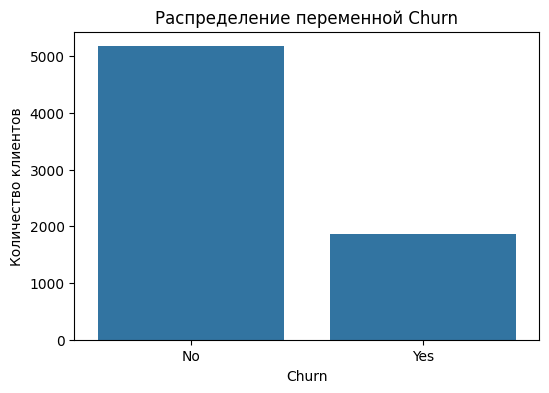

In [9]:
# Выполните первичный анализ данных
print('\nРаспределение целевой переменной')
print(df['Churn'].value_counts())

print('\nРаспределение в процентах')
print(df['Churn'].value_counts(normalize=True) * 100)

print('\nПроверка пропущенных значений')
print(df.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Распределение переменной Churn')
plt.xlabel('Churn')
plt.ylabel('Количество клиентов')
plt.show()



В датасете 7043 клиента, пропущенных значений нет, классы не сбалансированны, покинувших компанию клиентов почти 27%

# Шаг 4. Предобработка данных

Задание:
1. Удалите столбец customerID (не несет информации для модели).
2. Преобразуйте целевую переменную Churn:
   - No -> 0 (клиент остался)
   - Yes -> 1 (клиент ушел)
3. Обработайте столбец TotalCharges:
   - Преобразуйте в числовой формат с помощью pd.to_numeric (используйте errors='coerce')
   - Удалите строки с пропущенными значениями
4. Определите категориальные и числовые признаки.
5. Закодируйте категориальные признаки с помощью LabelEncoder.

Объяснение:
- Decision Tree работает только с числовыми данными.
- LabelEncoder преобразует строки в числа (например, Male->0, Female->1).
- TotalCharges может содержать пробелы вместо чисел (ошибка в данных).


In [10]:
# Удалите customerID
df = df.drop(columns=['customerID'])


In [11]:
# Преобразуйте целевую переменную Churn
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [12]:
# Обработайте TotalCharges и удалите строки с пропусками
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()



In [13]:
# Определите категориальные и числовые признаки
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns



In [14]:
# Закодируйте категориальные признаки с помощью LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])



# Шаг 5. Подготовка данных для обучения

Задание:
1. Создайте матрицу признаков X:
   - Удалите из датасета столбец Churn
2. Создайте вектор целевой переменной y:
   - Выделите столбец Churn
3. Выведите размеры X и y с помощью .shape.

Объяснение:
- X содержит все признаки для предсказания.
- y содержит целевую переменную (что предсказываем).


In [15]:
# Создайте X и y
X = df.drop(columns=['Churn'])
y = df['Churn']

print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (7032, 19)
y shape: (7032,)


# Шаг 6. Разделение на обучающую и тестовую выборки

Задание:
1. Разделите данные на train и test с помощью train_test_split.
2. Используйте следующие параметры:
   - test_size=0.2 (20% для теста, 80% для обучения)
   - random_state=42 (для воспроизводимости)
   - stratify=y (сохранить пропорции классов)
3. Выведите размеры полученных массивов.
4. Проверьте распределение классов в train и test.

Объяснение:
- train данные для обучения модели.
- test данные для оценки качества на новых данных.
- stratify=y гарантирует одинаковые пропорции классов.


In [16]:
# Разделите данные на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nРаспределение классов в обучающей выборке")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))




X_train shape: (5625, 19)
X_test shape: (1407, 19)
y_train shape: (5625,)
y_test shape: (1407,)

Распределение классов в обучающей выборке
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


# Шаг 7. Обучение модели Decision Tree

Задание:
1. Создайте объект модели DecisionTreeClassifier с параметрами:
   - max_depth=5 (ограничить глубину дерева)
   - random_state=42
2. Обучите модель на обучающих данных с помощью метода fit(X_train, y_train).
3. Выведите информацию о дереве: глубину и количество листьев.

Объяснение:
- DecisionTreeClassifier строит дерево решений для классификации.
- max_depth=5 ограничивает глубину, чтобы избежать переобучения.
- Метод fit обучает модель на данных X_train и y_train.


In [17]:
# Создайте и обучите модель
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

print("Глубина дерева:", dt_model.get_depth())
print("Количество листьев:", dt_model.get_n_leaves())


Глубина дерева: 5
Количество листьев: 32


# Шаг 8. Предсказания на тестовой выборке

Задание:
1. Сделайте предсказания классов для тестовой выборки с помощью predict(X_test).
2. Получите вероятности предсказаний с помощью predict_proba(X_test).
3. Выведите первые 20 предсказаний и сравните с реальными значениями.

Объяснение:
- predict(X_test) возвращает класс (0 или 1) для каждого примера.
- predict_proba(X_test) возвращает вероятности для каждого класса.
- predict_proba[:, 1] - вероятность класса 1 (Churn = Yes).


In [18]:
# Сделайте предсказания
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)

comparison = pd.DataFrame({
    'y_true': y_test.values[:20],
    'y_pred': y_pred[:20],
    'y_pred_proba_class_1': y_pred_proba[:20, 1]
})

print("\n20 первых предсказаний")
print(comparison)




20 первых предсказаний
    y_true  y_pred  y_pred_proba_class_1
0        0       0              0.009206
1        0       1              0.826230
2        0       0              0.009206
3        1       0              0.129870
4        0       0              0.108597
5        1       0              0.430921
6        0       0              0.027140
7        0       0              0.129870
8        1       1              0.605016
9        0       0              0.009206
10       0       1              0.683333
11       0       0              0.129870
12       0       1              0.605016
13       0       0              0.027140
14       1       0              0.206897
15       1       1              0.826230
16       1       1              0.683333
17       1       0              0.430921
18       0       0              0.129870
19       0       0              0.009206


# Шаг 9. Оценка качества модели - Метрики

Задание:
1. Рассчитайте метрики качества для тестовой выборки:
   - Accuracy (доля правильных ответов)
   - Precision (точность положительных предсказаний)
   - Recall (полнота, доля найденных ушедших клиентов)
   - F1-score (гармоническое среднее между precision и recall)
   - ROC-AUC (площадь под ROC-кривой)
2. Выведите все метрики в читаемом формате.
3. Дайте интерпретацию каждой метрики.

Объяснение метрик:
- Accuracy = (TP + TN) / всего - общая доля правильных ответов
- Precision = TP / (TP + FP) - из всех "Yes", сколько реально "Yes"
- Recall = TP / (TP + FN) - из реальных "Yes", сколько нашли
- F1-score = 2 * (Precision * Recall) / (Precision + Recall)
- ROC-AUC - общая мера качества модели (1.0 = идеально, 0.5 = случайно)


In [19]:
# Рассчитайте метрики качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")



Accuracy:  0.782
Precision: 0.609
Recall:    0.500
F1-score:  0.549
ROC-AUC:   0.819


# Шаг 10. Confusion Matrix (Матрица ошибок)

Задание:
1. Рассчитайте Confusion Matrix с помощью confusion_matrix(y_test, y_pred).
2. Выведите матрицу и распределите значения на TN, FP, FN, TP.
3. Проверьте формулы метрик вручную по значениям из матрицы.
4. Постройте визуализацию Confusion Matrix с помощью seaborn.heatmap.

Объяснение:
```
                Predicted: 0    Predicted: 1
Actual: 0          TN              FP
Actual: 1          FN              TP
```
- TN (True Negative): правильно предсказали 0
- FP (False Positive): ошибочно предсказали 1
- FN (False Negative): ошибочно предсказали 0
- TP (True Positive): правильно предсказали 1


In [20]:
# Рассчитайте и визуализируйте Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()
print('\nРаспределение от модели')
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

accuracy_manual = (TP + TN) / (TP + TN + FP + FN)
precision_manual = TP / (TP + FP)
recall_manual = TP / (TP + FN)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

print('\nРаспределение вручную')
print(f"Accuracy:  {accuracy_manual:.3f}")
print(f"Precision: {precision_manual:.3f}")
print(f"Recall:    {recall_manual:.3f}")
print(f"F1-score:  {f1_manual:.3f}")




Распределение от модели
True Negative (TN): 913
False Positive (FP): 120
False Negative (FN): 187
True Positive (TP): 187

Распределение вручную
Accuracy:  0.782
Precision: 0.609
Recall:    0.500
F1-score:  0.549


# Шаг 11. ROC-кривая и ROC-AUC

Задание:
1. Рассчитайте ROC-кривую с помощью roc_curve(y_test, y_pred_proba[:, 1]).
2. Рассчитайте площадь под кривой с помощью auc(fpr, tpr).
3. Постройте график ROC-кривой:
   - Ось X: False Positive Rate (FPR)
   - Ось Y: True Positive Rate (TPR = Recall)
   - Добавьте диагональ (случайная модель)
4. Интерпретируйте результат.

Объяснение:
- ROC-кривая показывает trade-off между TPR и FPR при разных порогах.
- ROC-AUC = 1.0 означает идеальную модель.
- ROC-AUC = 0.5 означает случайную модель (как подбрасывание монеты).
- Чем выше ROC-AUC, тем лучше модель.


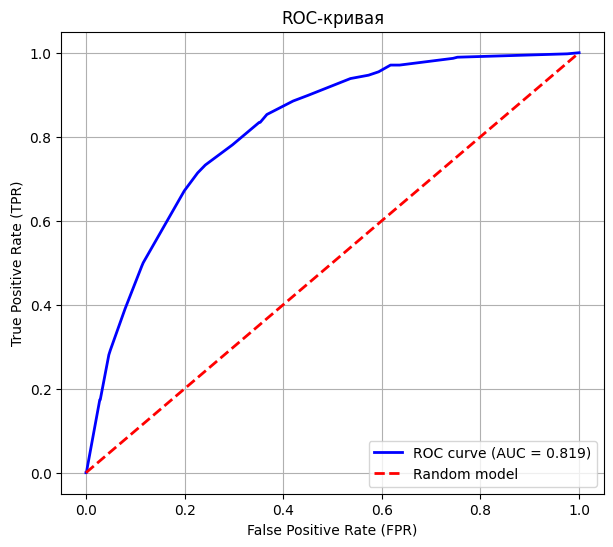

In [21]:
# Постройте ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random model')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



# Шаг 12. Precision-Recall кривая (PR-кривая)

Задание:
1. Рассчитайте PR-кривую с помощью precision_recall_curve(y_test, y_pred_proba[:, 1]).
2. Рассчитайте площадь под кривой с помощью auc(recall_curve, precision_curve).
3. Постройте график PR-кривой:
   - Ось X: Recall
   - Ось Y: Precision
   - Добавьте baseline (доля положительного класса)
4. Интерпретируйте результат.

Объяснение:
- PR-кривая полезнее ROC-кривой для несбалансированных данных.
- Она показывает trade-off между Precision и Recall.
- Чем выше PR-AUC, тем лучше модель.


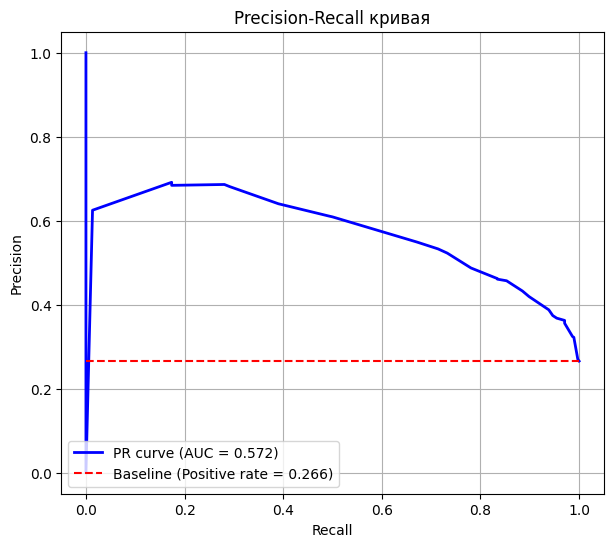

In [22]:
# Постройте PR-кривую
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_pred_proba[:, 1])
pr_auc_value = auc(recall_curve, precision_curve)

baseline = y_test.mean()

plt.figure(figsize=(7, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc_value:.3f})')
plt.hlines(baseline, 0, 1, color='red', linestyle='--', label=f'Baseline (Positive rate = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



# Шаг 13. Поиск оптимального порога

Задание:
1. Переберите пороги от 0.1 до 0.9 с шагом 0.05.
2. Для каждого порога рассчитайте метрики: Accuracy, Precision, Recall, F1-score.
3. Сохраните результаты в DataFrame.
4. Найдите порог с максимальным F1-score.
5. Постройте график зависимости метрик от порога.
6. Примените оптимальный порог и пересчитайте метрики.

Объяснение:
- По умолчанию порог = 0.5 (если вероятность >= 0.5, то класс 1).
- Для несбалансированных данных оптимальный порог может быть другим.
- Изменяя порог, мы меняем баланс между Precision и Recall.


In [24]:
# Найдите оптимальный порог
thresholds = np.arange(0.1, 0.91, 0.05)
results = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba[:, 1] >= thresh).astype(int)

    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    results.append([thresh, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

best_threshold = results_df.loc[results_df['F1-score'].idxmax(), 'Threshold']
print("Оптимальный порог:", best_threshold)



Оптимальный порог: 0.3500000000000001


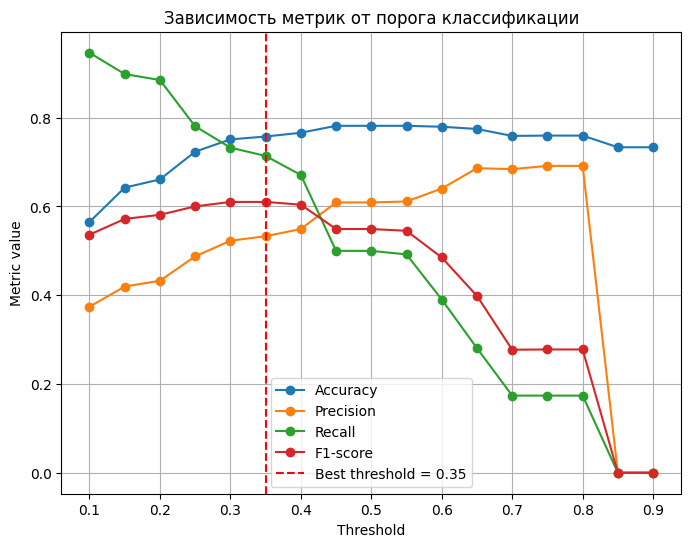

In [25]:
# Постройте график метрик при разных порогах
plt.figure(figsize=(8,6))
plt.plot(results_df['Threshold'], results_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision', marker='o')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall', marker='o')
plt.plot(results_df['Threshold'], results_df['F1-score'], label='F1-score', marker='o')

plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Metric value')
plt.title('Зависимость метрик от порога классификации')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Примените оптимальный порог и пересчитайте метрики
y_pred_opt = (y_pred_proba[:, 1] >= best_threshold).astype(int)

accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)

print(f"Метрики при оптимальном пороге {best_threshold:.2f}:")
print(f"Accuracy:  {accuracy_opt:.3f}")
print(f"Precision: {precision_opt:.3f}")
print(f"Recall:    {recall_opt:.3f}")
print(f"F1-score:  {f1_opt:.3f}")



Метрики при оптимальном пороге 0.35:
Accuracy:  0.758
Precision: 0.533
Recall:    0.714
F1-score:  0.610


# Шаг 14. Анализ результатов - Вопросы

Задание: Проанализируйте полученные результаты и ответьте на следующие вопросы:

Вопрос 1: Какова общая точность модели (Accuracy)? Можно ли считать это хорошим результатом для данной задачи? Почему?

Вопрос 2: Посмотрите на Precision и Recall. Какая метрика важнее для задачи прогнозирования оттока клиентов? Обоснуйте свой ответ.

Вопрос 3: Посмотрите на Confusion Matrix. Какой тип ошибок делает модель чаще: FP (ложные срабатывания) или FN (пропуски)? Что это означает для бизнеса?

Вопрос 4: Сравните ROC-AUC и PR-AUC. Какая метрика более информативна для этой задачи? Почему?

Вопрос 5: Изменились ли метрики после применения оптимального порога? Какой порог вы бы выбрали для применения модели на практике? Почему?

Вопрос 6: Если бы вы работали в телекоммуникационной компании, как бы вы использовали эту модель? Какие действия предприняли бы для клиентов с высокой вероятностью оттока?


Напишите ваши ответы здесь:

Ответ 1: Accuracy 0.758. В целом это хороший результат, но так как датасет не сбалансирован, то оно не отражает истинности


Ответ 2: Важнее recall, так как он охватывает долю всех кто хочет уйти, телеком может этим клиентам делать лояльность и удерживать


Ответ 3: Модель делает больше FN ложнонегативных. Для бинеса это плохо тем, что упустили клиента уже, тяжелее делать программу лояльности для возвращения


Ответ 4: PR-AUC более информативна, так как данные не сбалансированны и ROC-AUC может быть не достоверной


Ответ 5: Выбрал порог 0.35, сделал его, так как он увеличивает метрику recall


Ответ 6: Можно изучить карточку клиента, по его запросам предложить программу лояльности или бонусы



# Шаг 15. Выводы

Задание: Напишите общие выводы по результатам работы (5-7 предложений).

В выводах укажите:
- Какое качество показала модель Decision Tree?
- Какие метрики были наиболее информативными?
- Какой оптимальный порог был найден и как он повлиял на результаты?
- Можно ли использовать эту модель на практике?
- Что можно улучшить в модели?


Напишите ваши выводы здесь: На первых 20ти предсказаниях было всего три верно действительно ушедших, по метрикам F1 было 0.549, что не лучший реультат, почти случайный в среднем. Самой информативной было метрика recall, так как для телекома она выявляет потенциальных клиентов, которые могут уйти. Оптимальным порогом был 0.35, он повысил recall и улучшил его эффективность. Я думаю точно можно использовать эту модель на практике и разговаривать с клиентами склонных к уходу. Для улучшения модели можно расширять датасет больше с точными данными, возможно попробовать обучить модель на сбалансированном датасете и сверить результаты, применить наилучшую



# Рекомендации:
- Внимательно читайте комментарии и объяснения к каждому шагу.
- Не копируйте код механически, старайтесь понять, что делает каждая строка.
- Проверяйте промежуточные результаты (выводите размеры массивов, первые строки данных).
- При возникновении ошибок внимательно читайте текст ошибки.
- Используйте материалы практики для справки.
